In [ ]:
import pandas as pd
import numpy as np
import torch
import os
import scipy
from datasets import load_dataset

dataset = load_dataset("amazon_polarity", split="train")
corpus = dataset.shuffle(seed=42)[:10000]['content']

Reusing dataset amazon_polarity (/root/.cache/huggingface/datasets/amazon_polarity/amazon_polarity/3.0.0/ac31acedf6cda6bc2aa50d448f48bbad69a3dd8efc607d2ff1a9e65c2476b4c1)


Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/amazon_polarity/amazon_polarity/3.0.0/ac31acedf6cda6bc2aa50d448f48bbad69a3dd8efc607d2ff1a9e65c2476b4c1/cache-32f8db943837ee14.arrow


In [ ]:
!pip install sentence-transformers

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
from sentence_transformers import SentenceTransformer 

model_path = "paraphrase-distilroberta-base-v1"
model = SentenceTransformer(model_path)

In [ ]:
corpus_embeddings = model.encode(corpus)
corpus_embeddings.shape

(10000, 768)

In [ ]:
from sklearn.cluster import KMeans
K=5
kmeans = KMeans(
    n_clusters=K,
    random_state=0
).fit(corpus_embeddings)

cls_dist = pd.Series(kmeans.labels_).value_counts()
cls_dist

0    2759
3    2155
4    1890
1    1849
2    1347
dtype: int64

In [ ]:
import numpy as np
distances = scipy.spatial.distance.cdist(kmeans.cluster_centers_,
    corpus_embeddings)
centers = {}
print("Cluster", "Size", "Center-idx", "Center-Example", sep="\t\t")
for i, d in enumerate(distances):
    ind = np.argsort(d, axis=0)[0]
    centers[i] = ind
    print(i, cls_dist[i], ind, corpus[ind], sep="\t\t")

Cluster		Size		Center-idx		Center-Example
0		2759		1761		I read this book a while back and thought it was very interesting. It's a good book to read if your tired of just reading love stories all the time.
1		1849		9447		I ordered the product I see on the screen but what I got was a white bottle of some other type of shampoo... it was NOT just the packaging.How can someone be loyal to a product if they keep changing the formulas!? You will never keep everyone happy.I was disappointed that after 2 calls no correction was ever sent. VERY disappointed.
2		1347		3900		This album like many rock/emo albums is good, but there is nothing innovative about it, some very catchy tunes, good singing, nice rhythm. Awesome to listen to. Worth the buy.
3		2155		1474		The quality of this product is great, easy to clean and fits my sink perfectly.However, I think it is a little bit expensive.
4		1890		204		This DVD looks nice and all but is horrible because it skips and stuff after the first time I watc

In [ ]:
!pip install umap-learn

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
!pip install matplotlib

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


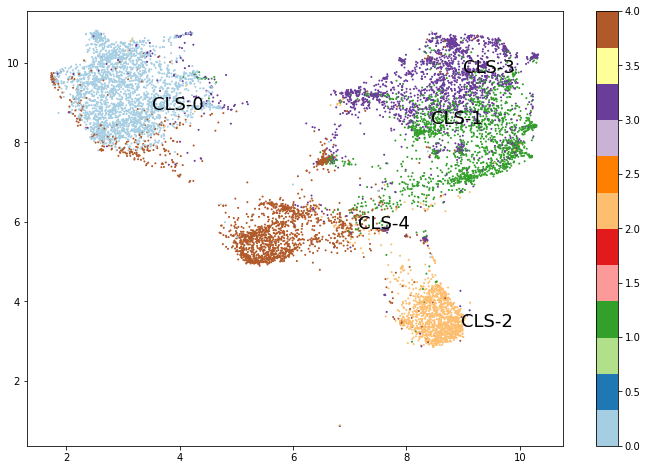

In [ ]:
import matplotlib.pyplot as plt
import umap

X = umap.UMAP(
    n_components=2,
    min_dist=0.0
).fit_transform(corpus_embeddings)
labels = kmeans.labels_
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(X[:,0], X[:, 1], c=labels, s=1, cmap='Paired')
for c in centers:
    plt.text(X[centers[c], 0], X[centers[c], 1], "CLS-"+str(c), fontsize=18)
plt.colorbar()

!pip install bertopic

# Topic Modeling with BERTopic

In [ ]:
!pip install bertopic
!python -m bertopic

  Using cached bertopic-0.9.3-py2.py3-none-any.whl (57 kB)


  Using cached PyYAML-5.4.1-cp36-cp36m-manylinux1_x86_64.whl (640 kB)


  Using cached hdbscan-0.8.27.tar.gz (6.4 MB)


  Installing build dependencies ... -

 \

 |

 /

 -

 done


  Getting requirements to build wheel ... -

 done


    Preparing wheel metadata ... -

 done


  Using cached plotly-4.14.2-py2.py3-none-any.whl (13.2 MB)


ERROR: Could not find a version that satisfies the requirement numpy>=1.20.0 (from bertopic) (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0rc1, 1.13.0rc2, 1.13.0, 1.13.1, 1.13.3, 1.14.0rc1, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0rc1, 1.15.0rc2, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0rc1, 1.16.0rc2, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0rc1, 1.17.0rc2, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0rc1, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0rc1, 1.19.0rc2, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5)
ERROR: No matching distribution found for numpy>=1.20.0 (from bertopic)


You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


/usr/bin/python: No module named bertopic


In [ ]:
from bertopic import BERTTopic

sentence_model = SentenceTransformer(
    "paraphrase-distilroberta-base-v1"
)

topic_model = BERTTopic(embedding_model=sentence_model)
topics, _ = topic_model.fit_transform(corpus)
topic_model.get_topic_info()[:6]

ModuleNotFoundError: No module named 'bertopic'

In [ ]:
topic_model.get_topic(5)

NameError: name 'topic_model' is not defined